# INTRODUCTION

### Welcome to this community competition here on Kaggle. The challenge is about predicting song popularity based on a set of certain features. The data consists of the standard kaggle CSV, which are - train, test and sample submission.

#### I will be conducting this EDA to go over the data to understand all its features.

#### This EDA was done in R by @heads or tails, so, I have tried to translate it to Python, and added a few dimensions.

In [4]:
# Import relevant modules

import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Read data and get an overview of the data

df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
df.head()

,id,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_popularity
0,0,212990.0,0.642286,0.856520,0.707073,0.002001,10.0,NaN,-5.619088,0,0.082570,158.386236,4,0.734642,0
1,1,NaN,0.054866,0.733289,0.835545,0.000996,8.0,0.436428,-5.236965,1,0.127358,102.752988,3,0.711531,1
2,2,193213.0,NaN,0.188387,0.783524,-0.002694,5.0,0.170499,-4.951759,0,0.052282,178.685791,3,0.425536,0
3,3,249893.0,0.488660,0.585234,0.552685,0.000608,0.0,0.094805,-7.893694,0,0.035618,128.715630,3,0.453597,0
4,4,165969.0,0.493017,NaN,0.740982,0.002033,10.0,0.094891,-2.684095,0,0.050746,121.928157,4,0.741311,0


In [6]:
# Let's take a more detailed view of the data

df.info

<bound method DataFrame.info of           id  song_duration_ms  acousticness  danceability    energy  \
0          0          212990.0      0.642286      0.856520  0.707073   
1          1               NaN      0.054866      0.733289  0.835545   
2          2          193213.0           NaN      0.188387  0.783524   
3          3          249893.0      0.488660      0.585234  0.552685   
4          4          165969.0      0.493017           NaN  0.740982   
...      ...               ...           ...           ...       ...   
39995  39995          237799.0           NaN      0.748942  0.511234   
39996  39996          191119.0      0.067488      0.672830  0.889685   
39997  39997          160879.0      0.877431      0.409065  0.292671   
39998  39998          193918.0           NaN      0.365738       NaN   
39999  39999          196475.0      0.007116      0.354585  0.994883   

       instrumentalness   key  liveness   loudness  audio_mode  speechiness  \
0              0.002001 

In [7]:
# Let's pull the statistics of the TRAIN dataset

df.describe()

,id,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_popularity
count,40000.00000,35899.000000,36008.000000,35974.000000,36025.000000,36015.000000,35935.000000,35914.000000,36043.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,19999.50000,193165.847572,0.276404,0.570951,0.683932,0.036527,5.042605,0.198514,-7.407596,0.321150,0.094107,116.562815,3.394375,0.580645,0.364400
std,11547.14972,45822.127679,0.297928,0.190010,0.212662,0.150024,3.372728,0.151670,3.877198,0.466924,0.083591,26.167911,0.524405,0.237351,0.481268
min,0.00000,25658.000000,-0.013551,0.043961,-0.001682,-0.004398,0.000000,0.027843,-32.117911,0.000000,0.015065,62.055779,2.000000,0.013398,0.000000
25%,9999.75000,166254.500000,0.039618,0.424760,0.539276,0.000941,2.000000,0.111796,-9.578139,0.000000,0.038500,96.995309,3.000000,0.398669,0.000000
50%,19999.50000,186660.000000,0.140532,0.608234,0.704453,0.001974,5.000000,0.135945,-6.345413,0.000000,0.055881,113.795959,3.000000,0.598827,0.000000
75%,29999.25000,215116.000000,0.482499,0.718464,0.870503,0.003225,8.000000,0.212842,-4.620711,1.000000,0.118842,128.517383,4.000000,0.759635,1.000000
max,39999.00000,491671.000000,1.065284,0.957131,1.039741,1.075415,11.000000,1.065298,-0.877346,1.000000,0.560748,219.163578,5.000000,1.022558,1.000000


In [8]:
# Let's pull the statistics of the TRAIN dataset

test.describe()

,id,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,10000.00000,9043.000000,9050.000000,9024.000000,8945.000000,9000.000000,9008.000000,8994.000000,8974.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,193091.108813,0.280280,0.569817,0.683552,0.036588,5.012544,0.196379,-7.422145,0.323800,0.094242,116.460635,3.391800,0.576109
std,2886.89568,46502.319884,0.299971,0.190177,0.212561,0.151470,3.387481,0.149440,3.902743,0.467948,0.084294,26.320082,0.529075,0.236501
min,0.00000,25377.000000,-0.013585,0.064548,0.020959,-0.003344,0.000000,0.034516,-29.887298,0.000000,0.017554,60.702888,2.000000,0.017450
25%,2499.75000,166689.000000,0.042181,0.426734,0.541975,0.000930,2.000000,0.111599,-9.654517,0.000000,0.038282,96.951325,3.000000,0.395860
50%,4999.50000,186196.000000,0.141564,0.605759,0.700278,0.001964,5.000000,0.135997,-6.346205,0.000000,0.055208,113.258381,3.000000,0.588477
75%,7499.25000,215059.000000,0.493003,0.715491,0.870670,0.003165,8.000000,0.208563,-4.605297,1.000000,0.118976,128.020862,4.000000,0.755265
max,9999.00000,448558.000000,1.046311,0.946831,1.031383,1.020970,11.000000,1.003777,-0.879306,1.000000,0.526199,213.922252,5.000000,1.013865


In [9]:
# How many rows and columns do we have

df.shape

(40000, 15)

In [10]:
# Very important to check for null values

df.isna().any()

id                  False
song_duration_ms     True
acousticness         True
danceability         True
energy               True
instrumentalness     True
key                  True
liveness             True
loudness             True
audio_mode          False
speechiness         False
tempo               False
time_signature      False
audio_valence       False
song_popularity     False
dtype: bool

<Figure size 720x432 with 0 Axes>

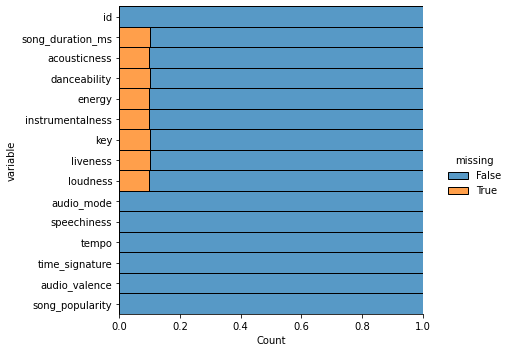

In [11]:
# Let's visualize the missing data in the TRAIN data

plt.figure(figsize=(10,6))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25)

plt.show()

<Figure size 720x432 with 0 Axes>

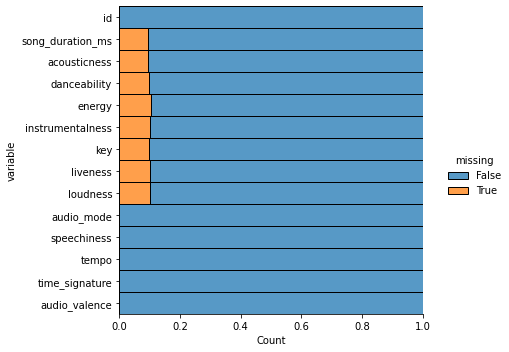

In [12]:
# Let's visualize the missing data in the TEST data

plt.figure(figsize=(10,6))
sns.displot(
    data=test.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25)

plt.show()

In [13]:
#Check for duplicate values

df.duplicated().any()

False

In [14]:
# Let's kknow the data types we are dealing with

df.dtypes

id                    int64
song_duration_ms    float64
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
key                 float64
liveness            float64
loudness            float64
audio_mode            int64
speechiness         float64
tempo               float64
time_signature        int64
audio_valence       float64
song_popularity       int64
dtype: object

In [15]:
df.isna().values.any()

True

#### Some observations.


* So, we can see that there are NAN values in some columns, we dealt with Nans by filling with 0 since data is numeric.
* We have no duplicate values.
* The data types are in floats and integers, so, we have no categorical data.
* Data contains 40,000 rows and 15 columns.

#### Noted, now we will move on to other aspects of the EDA

## Visualization of Individual Features

In [16]:
# Let's have another view of the data

df.head()

,id,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_popularity
0,0,212990.0,0.642286,0.856520,0.707073,0.002001,10.0,NaN,-5.619088,0,0.082570,158.386236,4,0.734642,0
1,1,NaN,0.054866,0.733289,0.835545,0.000996,8.0,0.436428,-5.236965,1,0.127358,102.752988,3,0.711531,1
2,2,193213.0,NaN,0.188387,0.783524,-0.002694,5.0,0.170499,-4.951759,0,0.052282,178.685791,3,0.425536,0
3,3,249893.0,0.488660,0.585234,0.552685,0.000608,0.0,0.094805,-7.893694,0,0.035618,128.715630,3,0.453597,0
4,4,165969.0,0.493017,NaN,0.740982,0.002033,10.0,0.094891,-2.684095,0,0.050746,121.928157,4,0.741311,0


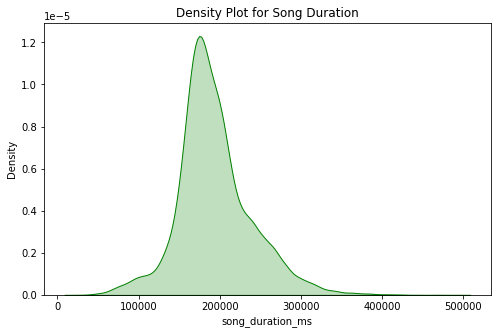

In [17]:
# Filter out Nan values from song duration column

filtered_song_duration_ms = df[df['song_duration_ms'].notnull()]

#Plot

fig, ax = plt.subplots(figsize=(8,5))
sns.kdeplot(filtered_song_duration_ms['song_duration_ms'], color="green", shade=True)
ax.set_title('Density Plot for Song Duration')
plt.show()

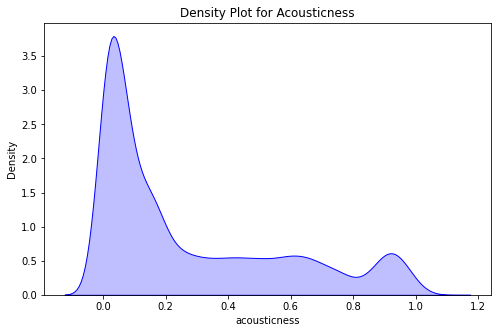

In [18]:
# filter for null values
filtered_acousticness = df[df['acousticness'].notnull()]

#plot

fig, ax = plt.subplots(figsize=(8,5))
sns.kdeplot(filtered_acousticness['acousticness'], color="blue", shade=True)
ax.set_title('Density Plot for Acousticness')
plt.show()

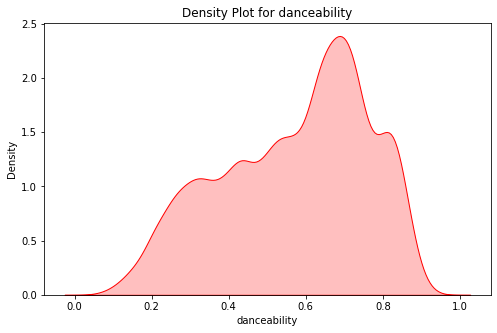

In [19]:
# filter for null values
filtered_danceability = df[df['danceability'].notnull()]

#plot

fig, ax = plt.subplots(figsize=(8,5))
sns.kdeplot(filtered_danceability['danceability'], color="red", shade=True)
ax.set_title('Density Plot for danceability')
plt.show()

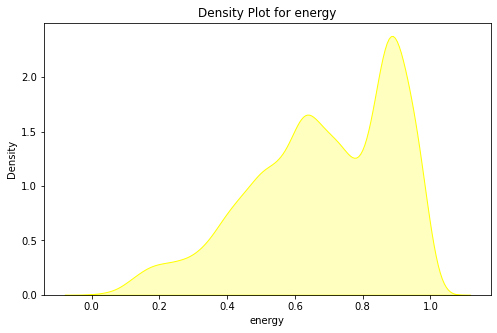

In [20]:
# filter for null values
filtered_energy = df[df['energy'].notnull()]

#plot
fig, ax = plt.subplots(figsize=(8,5))

sns.kdeplot(filtered_energy['energy'], color="yellow", shade=True)
ax.set_title('Density Plot for energy')
plt.show()

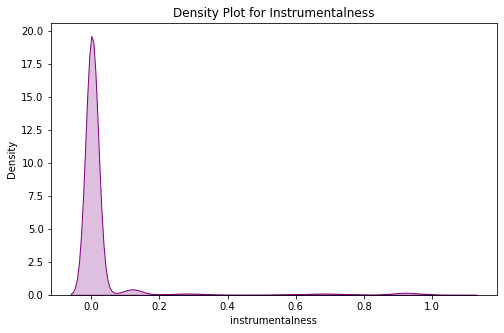

In [21]:
# filter for null values
filtered_instrumentalness = df[df['instrumentalness'].notnull()]

#plot
fig, ax = plt.subplots(figsize=(8,5))

sns.kdeplot(filtered_instrumentalness['instrumentalness'], color="purple", shade=True)
ax.set_title('Density Plot for Instrumentalness')
plt.show()

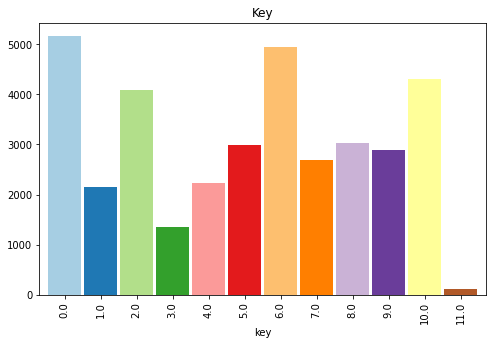

In [22]:
fig, ax = plt.subplots(figsize=(8,5))
df.groupby(['key'])['key'].count().plot.bar(width=0.9, color=plt.cm.Paired(np.arange(len(df))))
ax.set_title('Key')
plt.show()

In [23]:
# ax = df['filtered_song_duration_ms'].plot.kde(bw_method=0.3)

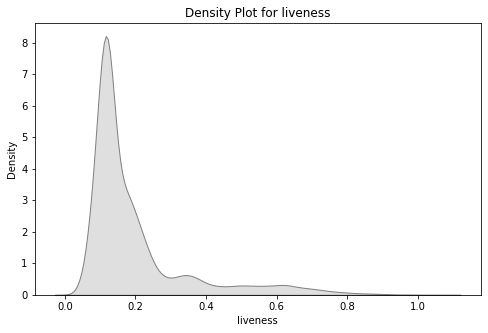

In [24]:
# filter for null values
filtered_liveness = df[df['liveness'].notnull()]

#plot
fig, ax = plt.subplots(figsize=(8,5))

sns.kdeplot(filtered_liveness['liveness'], color="grey", shade=True)
ax.set_title('Density Plot for liveness')
plt.show()

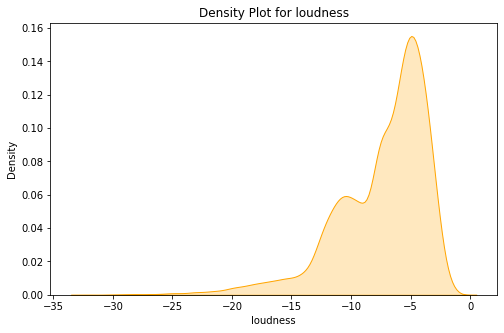

In [25]:
# filter for null values
filtered_loudness = df[df['loudness'].notnull()]

#plot
fig, ax = plt.subplots(figsize=(8,5))

sns.kdeplot(filtered_loudness['loudness'], color="orange", shade=True)
ax.set_title('Density Plot for loudness')
plt.show()

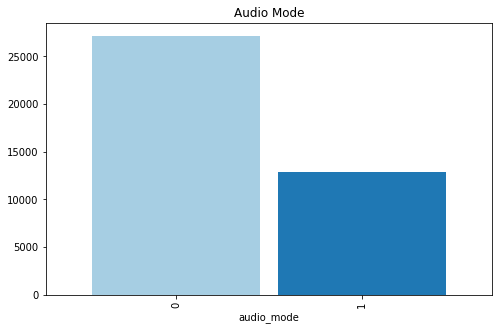

In [26]:

fig, ax = plt.subplots(figsize=(8,5))
df.groupby(['audio_mode'])['audio_mode'].count().plot.bar(width=0.9, color=plt.cm.Paired(np.arange(len(df))))
ax.set_title('Audio Mode')
plt.show()


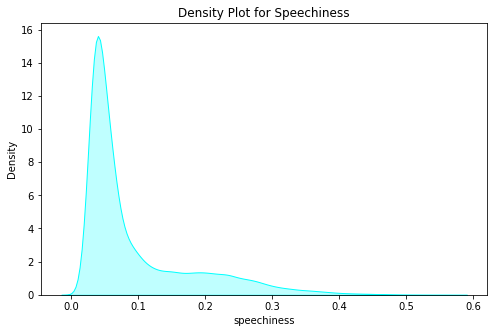

In [27]:
# filter for null values
filtered_speechiness = df[df['speechiness'].notnull()]

#plot
fig, ax = plt.subplots(figsize=(8,5))

sns.kdeplot(filtered_speechiness['speechiness'], color="cyan", shade=True)
ax.set_title('Density Plot for Speechiness')
plt.show()

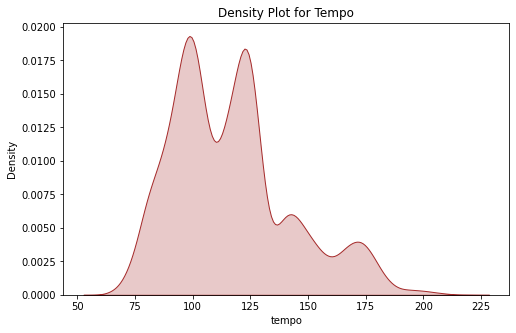

In [28]:
# filter for null values
filtered_tempo = df[df['tempo'].notnull()]

#plot
fig, ax = plt.subplots(figsize=(8,5))

sns.kdeplot(filtered_tempo['tempo'], color="brown", shade=True)
ax.set_title('Density Plot for Tempo')
plt.show()

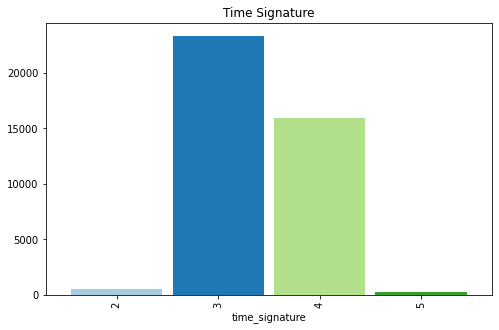

In [29]:

fig, ax = plt.subplots(figsize=(8,5))
df.groupby(['time_signature'])['time_signature'].count().plot.bar(width=0.9, color=plt.cm.Paired(np.arange(len(df))))
ax.set_title('Time Signature')
plt.show()


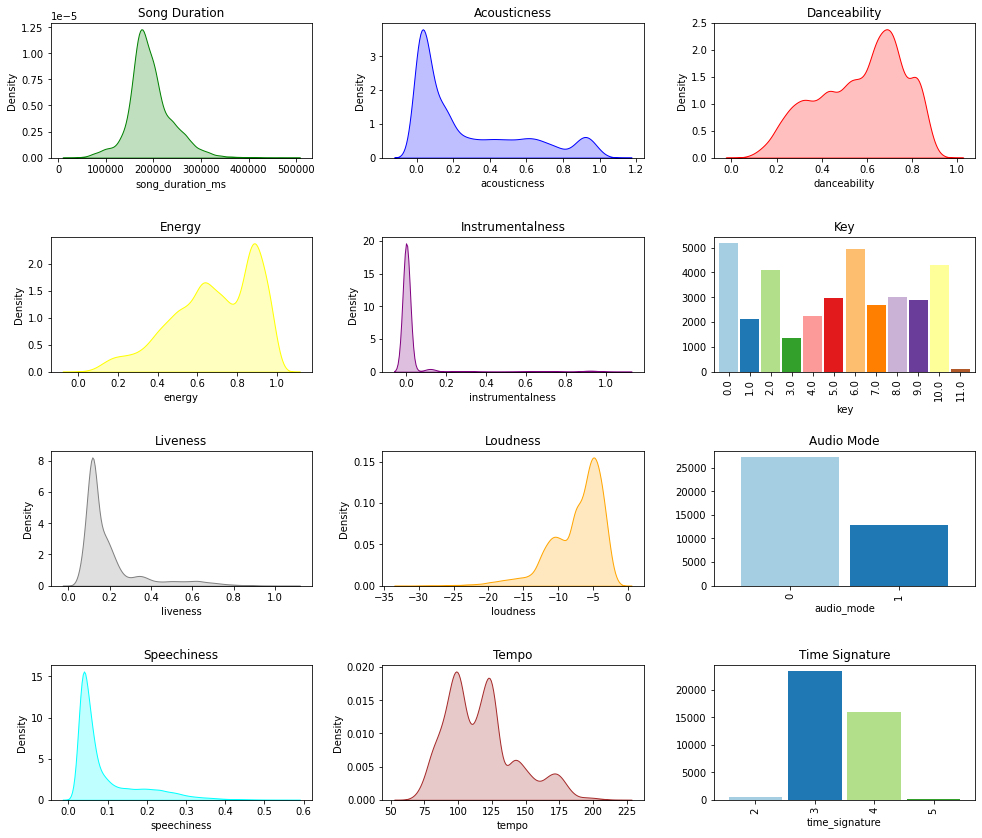

In [30]:
fig, ax = plt.subplots(4, 3, figsize=(14, 12))

sns.kdeplot(filtered_song_duration_ms['song_duration_ms'],color = 'green',shade=True, ax=ax[0,0]).set(title='Song Duration')
sns.kdeplot(filtered_acousticness['acousticness'], color="blue", shade=True, ax=ax[0,1]).set(title='Acousticness')
sns.kdeplot(filtered_danceability['danceability'], color="red", shade=True, ax=ax[0,2]).set(title='Danceability')
sns.kdeplot(filtered_energy['energy'], color='yellow', shade=True, ax=ax[1,0]).set(title='Energy')
sns.kdeplot(filtered_instrumentalness['instrumentalness'], color='purple', shade=True, ax=ax[1,1]).set(title='Instrumentalness')
df.groupby(['key'])['key'].count().plot.bar(width=0.9, color=plt.cm.Paired(np.arange(len(df))), ax=ax[1,2], title='Key')
sns.kdeplot(filtered_liveness['liveness'], color='grey', shade=True, ax=ax[2,0]).set(title='Liveness')
sns.kdeplot(filtered_loudness['loudness'], color='orange', shade=True, ax=ax[2,1]).set(title='Loudness')
df.groupby(['audio_mode'])['audio_mode'].count().plot.bar(width=0.9,
                                                          color=plt.cm.Paired(np.arange(len(df))),ax=ax[2,2],title='Audio Mode')

sns.kdeplot(filtered_speechiness['speechiness'], color="cyan", shade=True, ax=ax[3,0]).set(title='Speechiness')
sns.kdeplot(filtered_tempo['tempo'], color="brown", shade=True, ax=ax[3,1]).set(title='Tempo')
df.groupby(['time_signature'])['time_signature'].count().plot.bar(
    width=0.9, color=plt.cm.Paired(np.arange(len(df))),ax=ax[3,2],title='Time Signature')


plt.tight_layout(pad=2)
plt.show()

## Observations

#### Based on the above visualizations, we observe that:

* The veriable audio_mode is a boolean feature, while Key and time_scale are ordinal/categorical variables.
* The features - accosticness, danceability, energy, liveliness, speechiness & audio_valence are bound between 0 and 1.
* The feature loudness may refer to decibel scale.

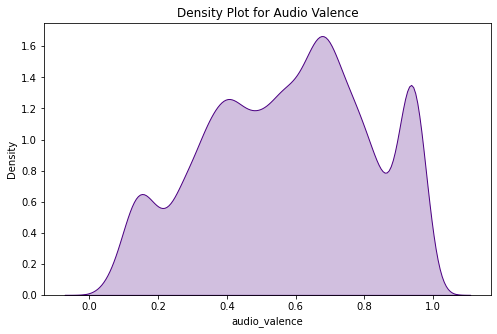

In [31]:
# filter for null values
filtered_audio_valence = df[df['audio_valence'].notnull()]

#plot
fig, ax = plt.subplots(figsize=(8,5))

sns.kdeplot(filtered_audio_valence['audio_valence'], color="indigo", shade=True)
ax.set_title('Density Plot for Audio Valence')
plt.show()

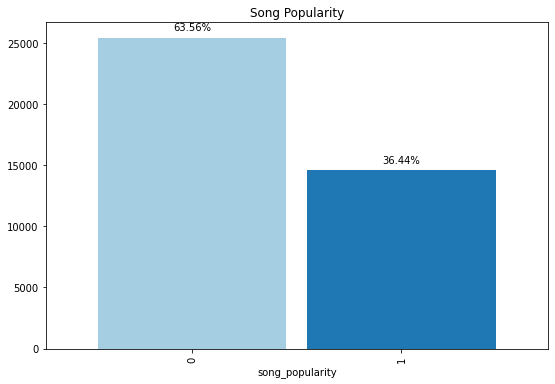

In [40]:
# Separating the songs by popularity

fig, ax = plt.subplots(figsize=(9,6))
df.groupby(['song_popularity'])['song_popularity'].count().plot.bar(width=0.9, color=plt.cm.Paired(np.arange(len(df))))
ax.set_title('Song Popularity')

total = len(df)
sizes = []

for p in ax.patches:
    height = p.get_height()
    sizes.append(height)
    ax.text(p.get_x() + p.get_width()/2.0, height+600, '{:1.2f}%'.format(height/total*100), ha='center')
    
plt.show()

### Observation

* 36.44% of the songs are popular, while 63.56% of the songs are not.

#### Next, I will drill down by categorical variables by popularity.



#  



 

## Analysis of Categorical Variables

* Audio mode
* Key
* Time signature

 

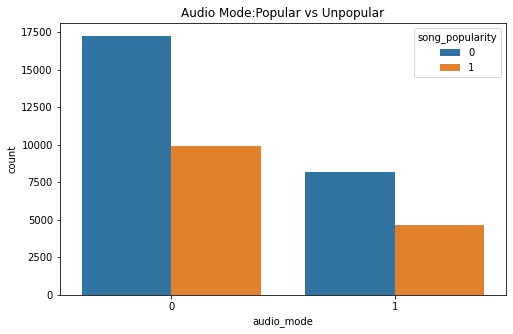

In [33]:
# Audio mode by popularity

fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(data=df, x='audio_mode',hue='song_popularity')
ax.set_title('Audio Mode:Popular vs Unpopular')
plt.show()


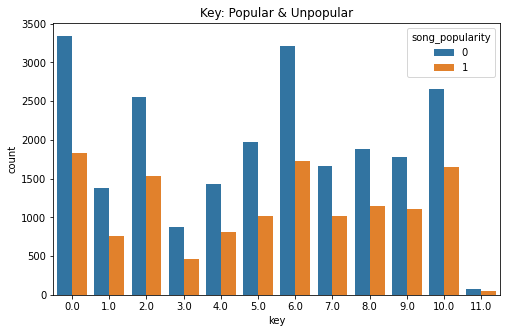

In [36]:
# Let's view count of songs key by popularity

fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(x='key',hue='song_popularity',data=df)
ax.set_title('Key: Popular & Unpopular')
plt.show()

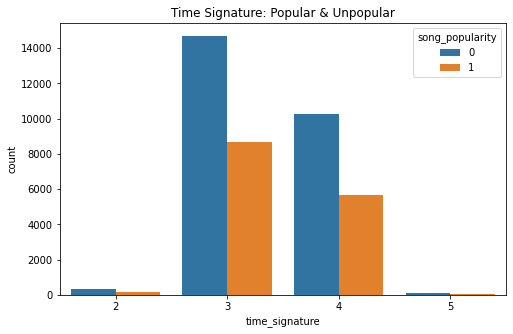

In [42]:
# Let's view time signature by popularity

fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(x='time_signature', hue='song_popularity', data= df)
ax.set_title('Time Signature: Popular & Unpopular')
plt.show()

### Observation

* We see that for most part, there are more unpopular songs for each variables.
* This is slightly different though, when song KEY is 11, and Time signature is 2 & 5.


 
 
 

## CORRELATION OVERVIEW

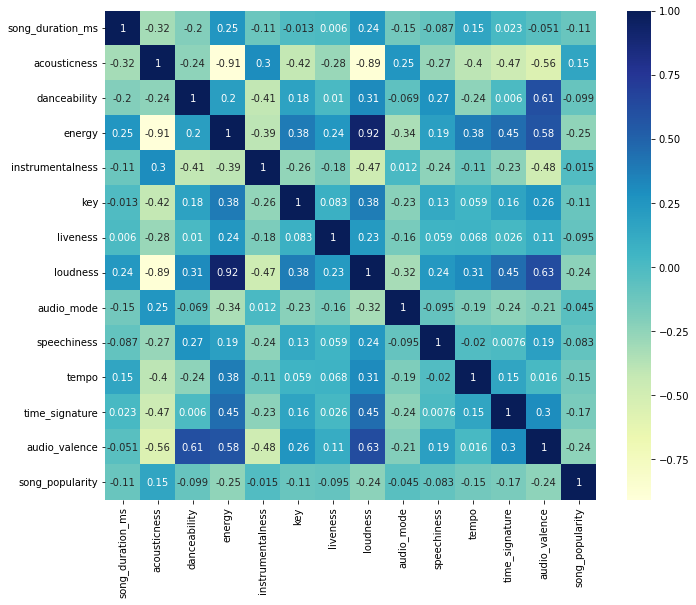

In [43]:
# Let's plot correlation overview of the variables.

fig, ax = plt.subplots(figsize=(11, 9))
df_correlations = df.iloc[:,1:].corr()
  
# plotting correlation heatmap
dataplot = sns.heatmap(df_correlations.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

### Some observations as follows;

* There’s a strong anti-correlation between acousticness vs energy (-0.91) and loudness (-0.86), respectively. 
* There's a strong correlation between energy and loudness (0.92).
* None of the features individually show a notable correlation with song_popularity, the target variable.

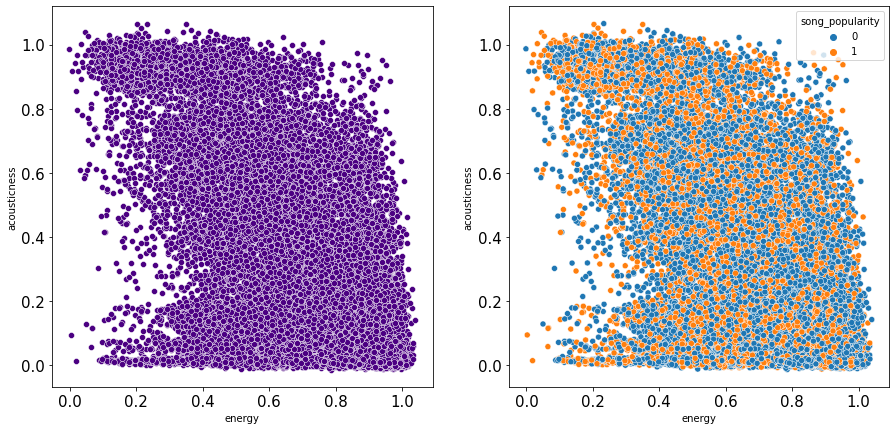

In [44]:
# Let's visualize the above observations using a scatterplot


plt.figure(figsize = (15,7))
plt.subplot(1,2,1)
sns.scatterplot(data = df.iloc[:,1:], x = 'energy', y = 'acousticness', color = 'indigo')
plt.xticks(size = 15,)
plt.yticks(size = 15,)

plt.subplot(1,2,2)
sns.scatterplot(data = df.iloc[:,1:], x = 'energy', y = 'acousticness', hue = 'song_popularity')
plt.xticks(size = 15,)
plt.yticks(size = 15,)

plt.show()

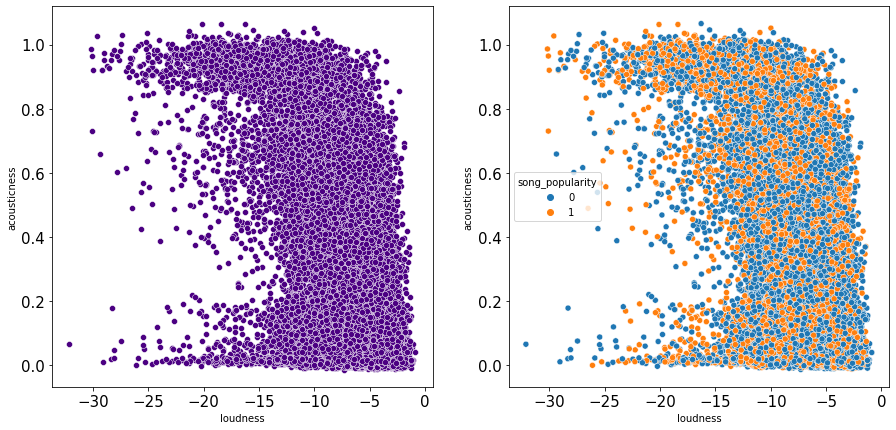

In [45]:
# Let's visualize the above observations using a scatterplot

plt.figure(figsize = (15,7))

plt.subplot(1,2,1)
sns.scatterplot(data = df.iloc[:,1:], x = 'loudness', y = 'acousticness', color = 'indigo')
plt.xticks(size = 15,)
plt.yticks(size = 15,)

plt.subplot(1,2,2)
sns.scatterplot(data = df.iloc[:,1:], x = 'loudness', y = 'acousticness', hue = 'song_popularity')
plt.xticks(size = 15,)
plt.yticks(size = 15,)

plt.show()

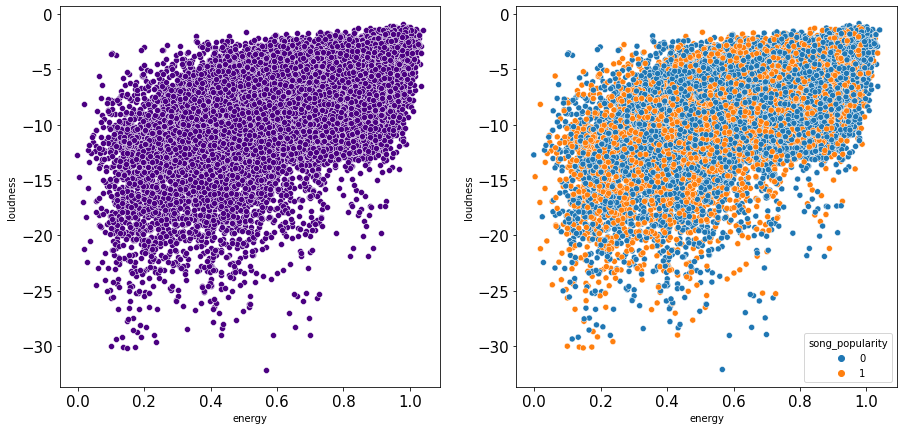

In [46]:
# Let's visualize the above observations using a scatterplot

plt.figure(figsize = (15,7))

plt.subplot(1,2,1)
sns.scatterplot(data = df.iloc[:,1:], x = 'energy', y = 'loudness', color = 'indigo')
plt.xticks(size = 15,)
plt.yticks(size = 15,)

plt.subplot(1,2,2)
sns.scatterplot(data = df.iloc[:,1:] , x = 'energy', y = 'loudness', hue = 'song_popularity')
plt.xticks(size = 15,)
plt.yticks(size = 15,)

plt.show()

### Observation
* Seen here the correlation between energy and loudness.

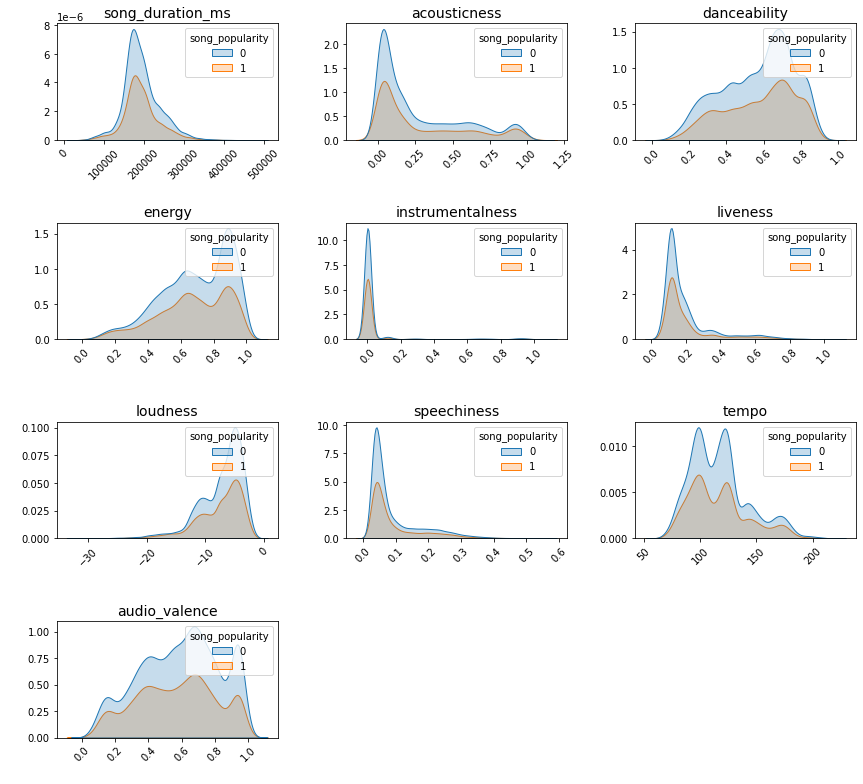

In [47]:
import random

useful_colors = [col for col in df.columns if col not in ['id', 'song_popularity']]
color_distribution = [col for col in useful_colors if col not in ['key', 'audio_mode', 'time_signature']]


plt.figure(figsize = (12,11))
colors = ['#9D2417', '#AF41B4', '#003389' ,'#3C5F41',  '#967032', '#2734DE'] 
for i in enumerate(df[color_distribution].columns):
  rand_col = colors[random.sample(range(6), 1)[0]]

  plt.subplot(4,3, i[0]+1)
    
  sns.kdeplot(data = df, x = i[1], hue = 'song_popularity', fill = rand_col, color = rand_col )
  plt.title (i[1], color = 'black', fontsize=14)
  plt.xlabel(" ")
  plt.ylabel(" ")
  plt.xticks(rotation = 45)
  plt.tight_layout()
    
plt.show()

### Observation

* There is only a minor difference between the length or popular songs & unpopular songs.

## Final Words

* Thank you Martin Henze for the video on EDA, done in R.
* Purpose of this EDA was to translate from R to Python, largely achieved that.
* Observations here can form the basis to develop a machine learning model for prediction.
* I will revisit this in the near future.
